In [2]:
import os
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

# Set the working directory to the main folder
main_folder = '/home/sam/Desktop/beh_timescale'  # Adjust this path to your main folder
os.chdir(main_folder)

# Add the main folder to the system path
sys.path.insert(0, main_folder)

# Verify the working directory
print(os.getcwd())  # This should print '/home/sam/Desktop/beh_timescale'


/home/sam/Desktop/beh_timescale


## Data Analysis for LDS_sinWave_indiv

Data is initally in LDS_sinWave_indiv_v2 then compiled to `LDS_response_sinFunc_indiv.pickle`

0124' updated the segmentation - more rigid segmenting (smaller search area = 100) and wont store two of the same locations 

This dataset organizes experimental trials conducted on individual worms over various periods, stored in `LDS_response_sinFunc_indiv.pickle`.


### Structure Details
- **Experiment Keys**: Unique identifiers for different experimental setups.
- **Entries Under Keys**: 
Data: A list of numpy arrays representing trials for individual worms. Each array's rows represent trials, and columns represent time points (e.g., 14400 time points).
Stimulus ('stim'): A numpy array indicating UV stimulus data, with the same number of time points as the trials. The stim starts when it is not 0, then lasts until there are 2 0's in a row
- **Trials Per Worm**: Each worm's data might have a varying number of trials, depicted in rows within an array. Every row captures a trial with a uniform number of time points (this is tau = 14400).
- **Time Points**: Uniformly distributed across all trials, showing the response measurements for the duration of a trial.Tau is saved at the top level of the dictionary (as an experiment)

In [3]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

from tools.picklestructure import print_pickle_structure
#print_pickle_structure('data/LDS_response_sinFunc_indiv.pickle')

## Worm Activity by Trial Response Visualization

**Overview:** This grid of plots shows the activity data from various trials involving worms, plotted over time. Each subplot corresponds to a single trial of an individual worm.

**Plot Components:**
- **X-Axis:** Time in minutes, centered at zero when the stimulus starts.
- **Y-Axis:** Quantitative measure of worm activity.
- **Blue Line:** Represents the worm's activity response throughout the trial.
- **Red Line:** Indicates the application of the stimulus, overlaid on the activity for reference.

**Purpose:** These visualizations help analyze the temporal dynamics of worm responses to stimuli, facilitating comparisons across trials and conditions to understand behavioral patterns.


This plots an individual experiment and the trials(x-axis) by worm (y-axis)

In [4]:
from analysis_functions.results_sin_indiv import plot_worm_trials

# Load the individual responses pickle file
with open('data/LDS_response_sinFunc_indiv.pickle', 'rb') as f:
    test_result = pickle.load(f)

# Call the function
plot_worm_trials('013024WT_30m_3.4mPeriod')

ImportError: cannot import name 'load_and_filter_data' from 'analysis_functions.results_sin_indiv' (/home/sam/Desktop/beh_timescale/analysis_functions/results_sin_indiv.py)

## Heatmap of aggregated experiments

This plots a heatmap of compiled experiments with the same conditions and the response(x-axis) by trial (y-axis)

Filtered Experiments:
081823WT_30m_4mPeriod
081123WT_30m_4mPeriod
072123WT_30m_4mPeriod
080123WT_30m_4mPeriod
060324WT_s2_30m_4mPeriod
053124WT_s1_30m_4mPeriod
053124WT_s2_30m_4mPeriod
Trial 1: 35 worms
Trial 2: 34 worms
Trial 3: 34 worms
Trial 4: 30 worms
Trial 5: 30 worms
Trial 6: 30 worms
Trial 7: 29 worms
Trial 8: 28 worms
Trial 9: 28 worms
Trial 10: 28 worms
Trial 11: 27 worms
Trial 12: 18 worms
Trial 13: 14 worms
Trial 14: 11 worms
Trial 15: 6 worms
Trial 16: 6 worms
Trial 17: 2 worms
Trial 18: 2 worms
Trial 19: 2 worms
Time axis (minutes): [-30.00833333 -30.         -29.99166667 ...  89.96666667  89.975
  89.98333333]
Shape of trial averages: (19, 14400)


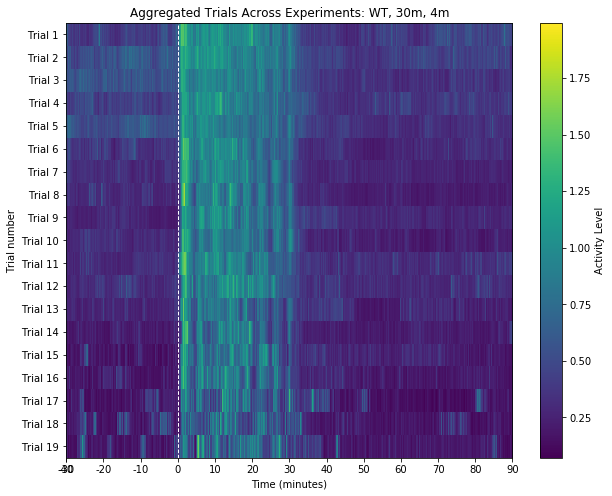

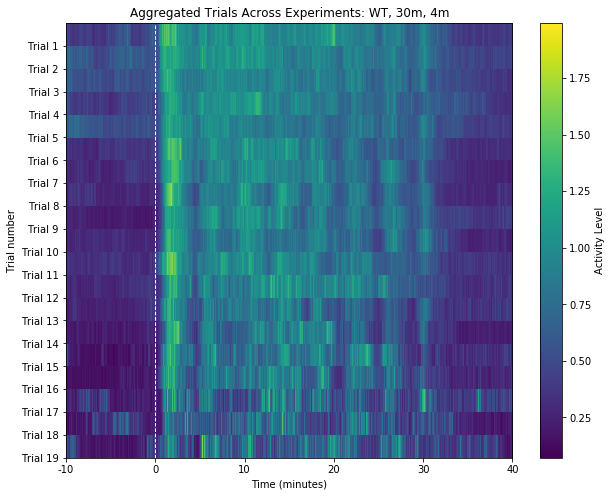

In [3]:
import pickle
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from analysis_functions.heatmap_indiv import *

# Load the pickle data
with open('data/LDS_response_sinFunc_indiv.pickle', 'rb') as f:
    test_result = pickle.load(f)

# Define filtering parameters
genotype = 'WT'
duration = '30m'
period_suffix = '4m'
exclude_dates = ['052623WT_30m_4mPeriod',]
#exclude_dates =['051724WT_s1_30m_3mPeriod','081123WT_30m_3mPeriod','081823WT_30m_3mPeriod','051724WT_s3_30m_3mPeriod','051724WT_s2_30m_3mPeriod']

all_trial_averages, time_axis_minutes = aggregate_heatmap(test_result, genotype, duration, period_suffix, exclude_dates)

# To specify a narrower  time range for the heatmap
x_min = -10
x_max = 40
plot_adjustable_heatmap(all_trial_averages, time_axis_minutes, f"Aggregated Trials Across Experiments: {genotype}, {duration}, {period_suffix}", x_min, x_max)

## Traces of aggregated trials

This plots a sine wave trace of compiled experiment with the same condition and the response(x-axis) by trial (y-axis)

Filtered Experiments:
081823WT_30m_3mPeriod
081123WT_30m_3mPeriod
050923WT_30m_3mPeriod
041823WT_30m_3mPeriod
051624WT_30m_3mPeriod
051724WT_s1_30m_3mPeriod
051724WT_s2_30m_3mPeriod
051724WT_s3_30m_3mPeriod
052024WT_s2_30m_3mPeriod
052024WT_s1_30m_3mPeriod
052424WT_s2_30m_3mPeriod
052824WT_s2_30m_3mPeriod


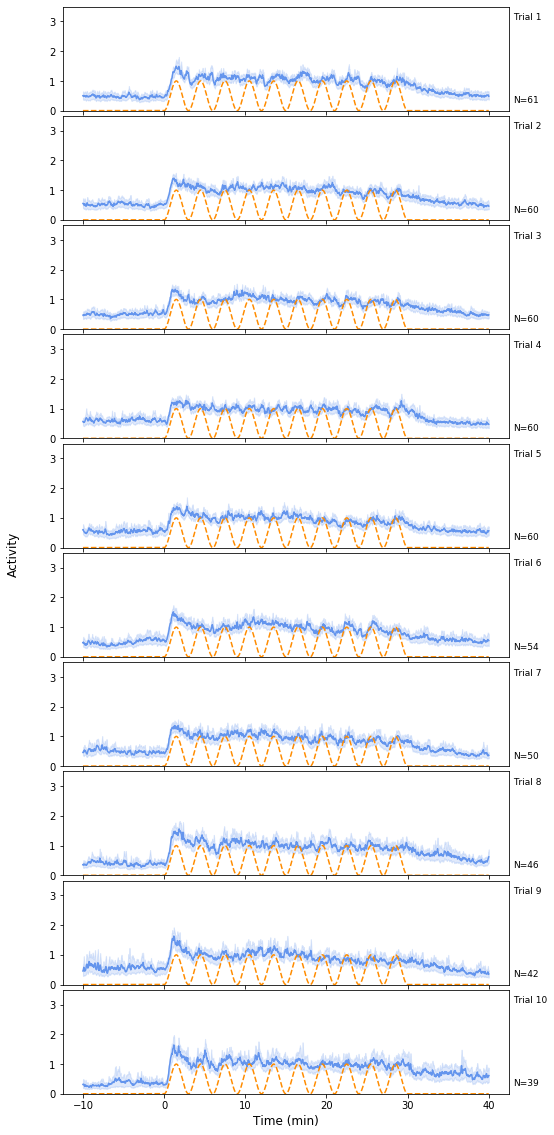

In [15]:
from analysis_functions.results_sin_indiv import *

# Load the pickle data
with open('data/LDS_response_sinFunc_indiv.pickle', 'rb') as f:
    test_result = pickle.load(f)

# Load and filter the data
test_result, filtered_experiments = load_and_filter_data(
    filepath='data/LDS_response_sinFunc_indiv.pickle',
    genotype='WT',
    duration='30m',
    period_suffix='4m',
    #exclude_dates = ['051724WT_s1_30m_3mPeriod','081123WT_30m_3mPeriod','081823WT_30m_3mPeriod','051724WT_s3_30m_3mPeriod','051724WT_s2_30m_3mPeriod']
    exclude_dates = ['052623WT_30m_4mPeriod',]
)

# Assuming 'tau' is accessible from 'test_result'
tau = test_result['tau']

# Specify the maximum number of trials
max_trials_limit = 10

# Prepare aggregated data with a limit on max trials
aggregated_data, sliced_tau, adjusted_stim_data, max_trials = prepare_aggregated_data(test_result, filtered_experiments, tau, max_trials_limit)

# Plot aggregated trials (now dynamically handles all trials)
plot_aggregated_trials(aggregated_data, sliced_tau, adjusted_stim_data, max_trials)

Filtered Experiments:
050923WT_30m_3mPeriod
041823WT_30m_3mPeriod
051624WT_30m_3mPeriod
052024WT_s2_30m_3mPeriod
052024WT_s1_30m_3mPeriod
052424WT_s2_30m_3mPeriod
052824WT_s2_30m_3mPeriod
Experiment to Color Mapping:
050923WT_30m_3mPeriod: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
041823WT_30m_3mPeriod: (0.6823529411764706, 0.7803921568627451, 0.9098039215686274)
051624WT_30m_3mPeriod: (1.0, 0.4980392156862745, 0.054901960784313725)
052024WT_s2_30m_3mPeriod: (1.0, 0.7333333333333333, 0.47058823529411764)
052024WT_s1_30m_3mPeriod: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
052424WT_s2_30m_3mPeriod: (0.596078431372549, 0.8745098039215686, 0.5411764705882353)
052824WT_s2_30m_3mPeriod: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)


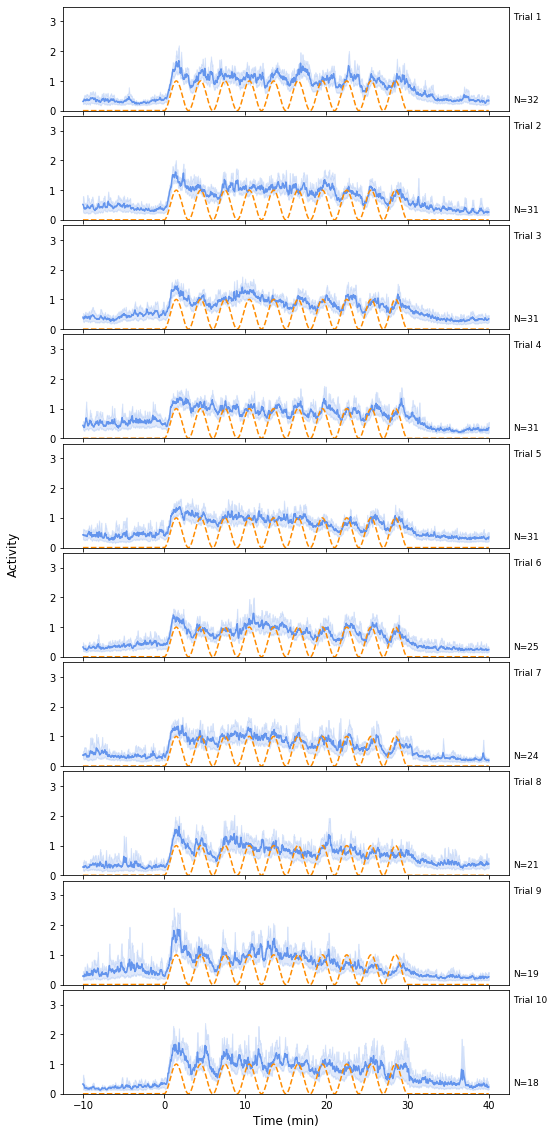

In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from analysis_functions.results_sin_indiv import *
from analysis_functions.PCA_behavior import *

# Load the pickle data
with open('data/LDS_response_sinFunc_indiv.pickle', 'rb') as f:
    test_result = pickle.load(f)

# Load and filter the data
test_result, filtered_experiments = load_and_filter_data(
    filepath='data/LDS_response_sinFunc_indiv.pickle',
    genotype='WT',
    duration='30m',
    period_suffix='3m',
    exclude_dates = ['051724WT_s1_30m_3mPeriod','081123WT_30m_3mPeriod','081823WT_30m_3mPeriod','051724WT_s3_30m_3mPeriod','051724WT_s2_30m_3mPeriod',]
    #exclude_dates=['052623WT_30m_4mPeriod',]
)

# Assuming 'tau' is accessible from 'test_result'
tau = test_result['tau']

# Exclude specific worms if necessary
exclude_worms = {
    '051624WT_30m_3mPeriod': [0,1,3],'052824WT_s2_30m_3mPeriod':[0,1],'050923WT_30m_3mPeriod': [3] }


# Prepare the data DataFrame
df = prepare_data_df(test_result, filtered_experiments, trials_range=range(15))

# Exclude specific worms from the DataFrame
df = exclude_worms_from_df(df, exclude_worms)
#df
# Specify the maximum number of trials
max_trials_limit = 10

# Prepare aggregated data from the filtered DataFrame
aggregated_data, sliced_tau, adjusted_stim_data, max_trials = prepare_aggregated_data_from_df(df, tau, test_result, max_trials_limit)

# Plot aggregated trials
plot_aggregated_trials(aggregated_data, sliced_tau, adjusted_stim_data, max_trials)


## Can we actually quantify learning


In [6]:
from analysis_functions.results_sin_indiv import *
from analysis_functions.correlation_indiv import *

with open('data/LDS_response_sinFunc_indiv.pickle', 'rb') as f:
    test_result = pickle.load(f)

# Load and filter data
test_result, filtered_experiments = load_and_filter_data(
    filepath='data/LDS_response_sinFunc_indiv.pickle',
    genotype='WT',
    duration='30m',
    period_suffix='4m',
    exclude_dates=[]
)

tau = test_result['tau']

max_trials_limit = 15

# Prepare aggregated data with a limit on max trials
aggregated_data, sliced_tau, adjusted_stim_data, max_trials = prepare_aggregated_data(test_result, filtered_experiments, tau, max_trials_limit)

# Quantify response and print correlations
correlations = quantify_response(test_result, filtered_experiments, tau, '3m', max_trials_limit)

plot_correlations(correlations, '3m', tau)

KeyError: 'stimulus'

In [ ]:
# Ensure the plotting function is correct once correlations are verified
import matplotlib.pyplot as plt